In [ ]:
import epitomes
import re
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances

In [ ]:
# load the style vectors from csv files
path = 'csvfiles'
tfidf_dict = {}
for filename in os.listdir(path):
    if filename.startswith('tfidf'):
        ngram, rank = re.findall('\d+', filename)
        ngram = int(ngram)
        rank = int(rank)
        if ngram in tfidf_dict:
            tfidf_dict[ngram][rank] = np.genfromtxt(os.path.join(path, filename), delimiter=',')
        else:
            tfidf_dict[ngram] = {}
            tfidf_dict[ngram][rank] = np.genfromtxt(os.path.join(path, filename), delimiter=',')

In [ ]:
epitome_path = 'epitomes'
epitome_texts, epitome_numbers = epitomes.load_epitomes(epitome_path)

In [ ]:
ngrams_list = [2, 3, 4]
ranks_list = [100, 200, 300]

In [ ]:
# my optimal_k notebook points towards 5 authors
n_authors = 2
kmean_dict = {}
for ngram in tfidf_dict:
    kmean_dict[ngram] = {}
    for rank in tfidf_dict[ngram]:
        # the default number of repeats is 100
        kmean_dict[ngram][rank] = epitomes.repeat_kmeans(tfidf_dict[ngram][rank], clusters=n_authors)

In [ ]:
concordances_dict = {}
for ngram in kmean_dict:
    concordances_dict[ngram] = {}
    for rank in kmean_dict[ngram]:
        concordances_dict[ngram][rank] = epitomes.concordance_heatmap(kmean_dict[ngram][rank])

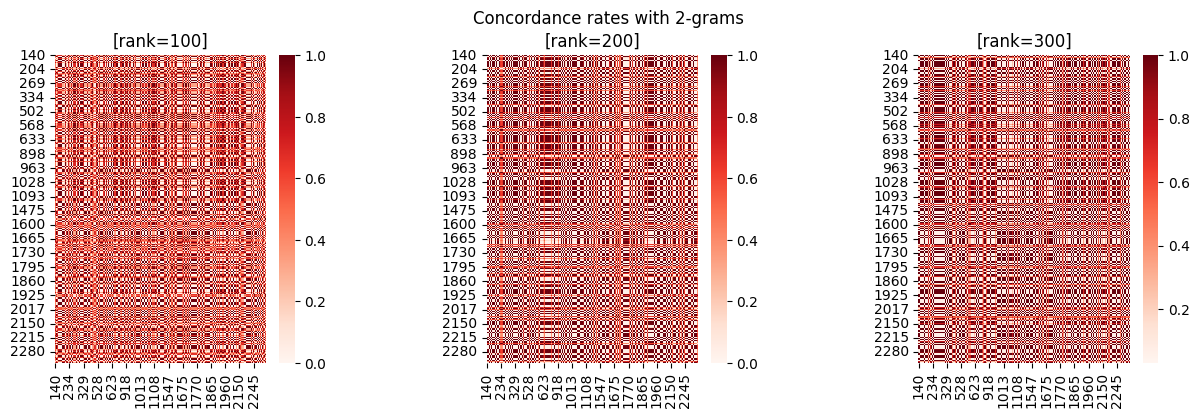

In [ ]:
n = 2
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(12, 4)
fig.suptitle(f'Concordance rates with {n}-grams')
plt.tight_layout(w_pad=9)

for idx, ax in enumerate(axes.reshape(-1)):
    sns.heatmap(concordances_dict[n][ranks_list[idx]], cmap='Reds', ax=ax)
    ax.set_title(f'[rank={ranks_list[idx]}]')
    ax.set_yticklabels(epitome_numbers[::len(epitome_numbers)//len(ax.get_yticks())+1])
    ax.set_xticklabels(epitome_numbers[::len(epitome_numbers)//len(ax.get_xticks())+1])

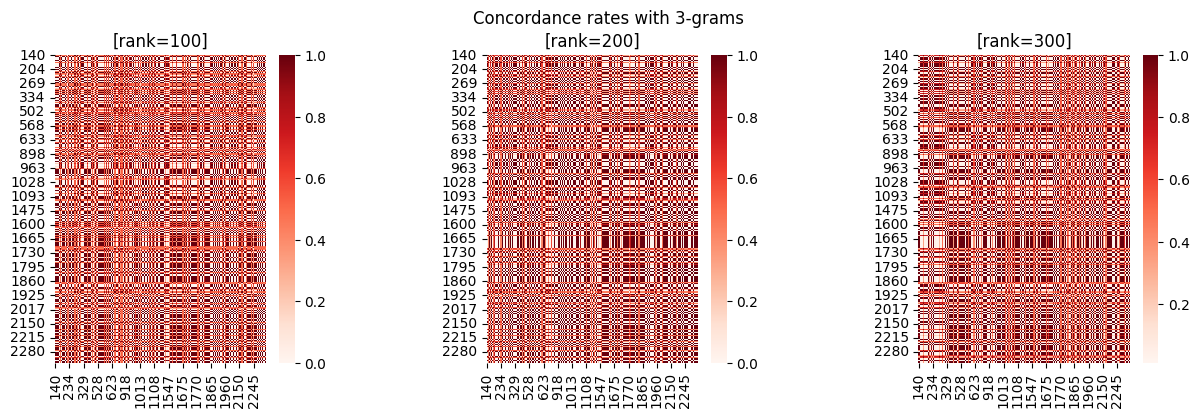

In [ ]:
n = 3
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(12, 4)
fig.suptitle(f'Concordance rates with {n}-grams')
plt.tight_layout(w_pad=9)

for idx, ax in enumerate(axes.reshape(-1)):
    sns.heatmap(concordances_dict[n][ranks_list[idx]], cmap='Reds', ax=ax)
    ax.set_title(f'[rank={ranks_list[idx]}]')
    ax.set_yticklabels(epitome_numbers[::len(epitome_numbers)//len(ax.get_yticks())+1])
    ax.set_xticklabels(epitome_numbers[::len(epitome_numbers)//len(ax.get_xticks())+1])

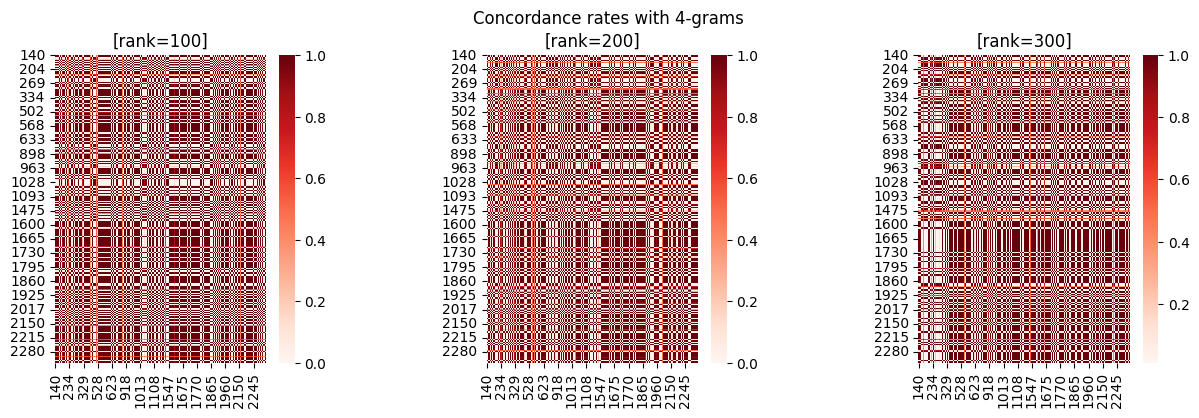

In [ ]:
n = 4
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(12, 4)
fig.suptitle(f'Concordance rates with {n}-grams')
plt.tight_layout(w_pad=9)

for idx, ax in enumerate(axes.reshape(-1)):
    sns.heatmap(concordances_dict[n][ranks_list[idx]], cmap='Reds', ax=ax)
    ax.set_title(f'[rank={ranks_list[idx]}]')
    ax.set_yticklabels(epitome_numbers[::len(epitome_numbers)//len(ax.get_yticks())+1])
    ax.set_xticklabels(epitome_numbers[::len(epitome_numbers)//len(ax.get_xticks())+1])